In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df = pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


Data Preprocessing Part 1

In [6]:
#Shape of the dataset
df.shape

(1064, 19)

In [8]:
#colums in the dataset
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [10]:
#dropping column ID, as it is a identifier and not required for analysis
df.drop('Id',axis=1,inplace=True)

In [12]:
#Column Data Types
df.dtypes

Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object

Type casting Price column to float

In [15]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [17]:
#Checking for null values percentage wise
df.isnull().sum()/df.shape[0]*100

Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

Here in the dataset, three columns have missing values - FuelType, TransmissionType and CngKit. I will be removing the CngKit column becuase in majority of the cars don't run on CNG and the CNG cars can be easily identified from the FuelType column. So we will replace the null values with 'No' in CngKit column. In case of the TransmissionType, 67% data is missing, so we can't include this column in our analysis. In case of the FuelType, we will drop the rows with null values.

In [20]:
df.drop('CngKit', axis=1, inplace=True)

In [22]:
#Dropping TransmissionType column
df.drop('TransmissionType',axis=1,inplace=True)

In [24]:
#Removing null values from FuelType column
df['FuelType'].dropna(inplace=True)

Dropping ManufacturerDate column as it the age of the car and we already have the ModelYear column

In [27]:
df.drop('ManufactureDate', axis = 1, inplace=True)

In [29]:
df.drop('Variant', axis = 1, inplace=True)

Changing the model year column to car age column

In [32]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [34]:
for i in df.columns:
    print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [36]:
df.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,6.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,4.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,8.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


In [38]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,5,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,2,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,8,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,3,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,13,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


Exploratory Data Analysis

In this exploratory data analysis, I will begin by examining the distribution of values across all columns to gain a clearer understanding of the dataset. Following that, I will explore the relationships between the target variable and the independent features to uncover any significant patterns or correlations.

Car Company

C:\Users\HP\AppData\Local\Temp\ipykernel_23948\2929482969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')


Text(0.5, 1.0, 'Number of cars by company')

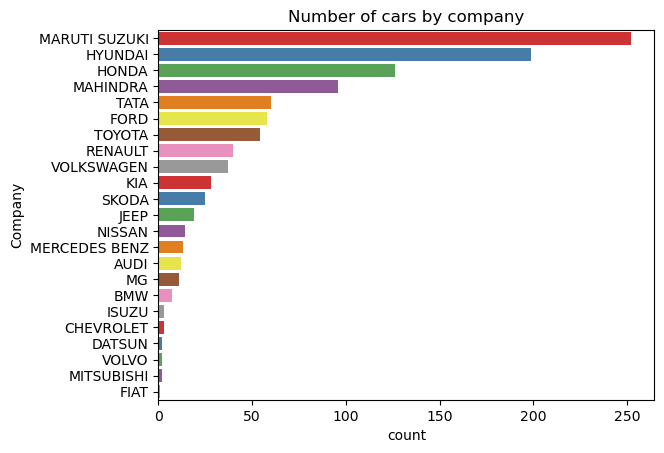

In [43]:
#Number of cars by company
sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')

This graph provides insight into the distribution of cars from various companies in the dataset. There are 23 car manufacturers represented, with Maruti Suzuki, Hyundai, Honda, Mahindra, and Tata emerging as the top five brands with the highest number of used cars listed for sale. This suggests that vehicles from these companies are likely considered more reliable and retain a better resale value over time.

Top 10 Car Models

C:\Users\HP\AppData\Local\Temp\ipykernel_23948\3123474212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')


Text(0.5, 1.0, 'Top 10 Car Models')

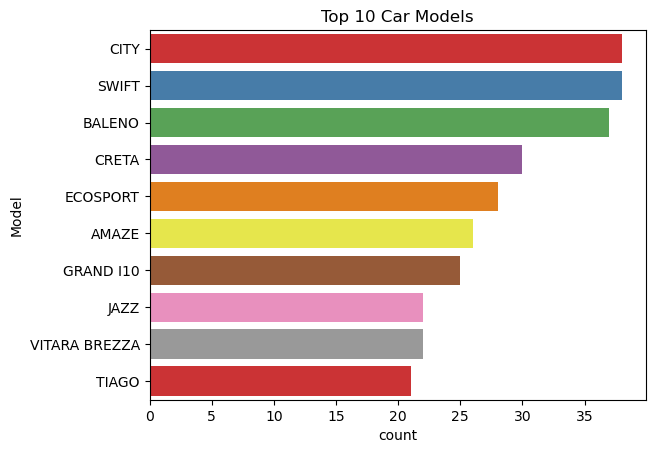

In [49]:
#Top 10 cars models by number
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')

Honda City and Swift are the most frequently listed car models in the dataset, with Baleno, Creta, and EcoSport following closely behind. This indicates that these models are not only popular but are also perceived as reliable with strong resale value. Additionally, the high number of listings suggests that Honda City and Swift have a strong presence and demand in the used car market.

Car Fuel Type

C:\Users\HP\AppData\Local\Temp\ipykernel_23948\183303738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

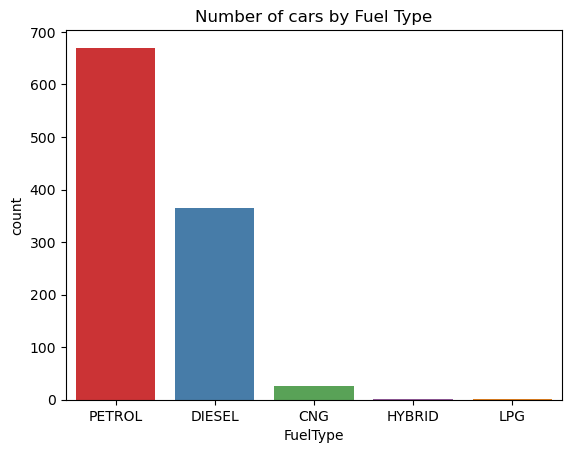

In [53]:
#Cars count by fuel type
sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')

The majority of the cars available for resale run on petrol, with over 650 listings, followed by approximately 350 diesel vehicles. In contrast, cars powered by CNG are far fewer, and those with hybrid or LPG engines are extremely rare. This suggests that petrol and diesel vehicles dominate the demand in the used car market.

Top 10 Colors for Cars

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

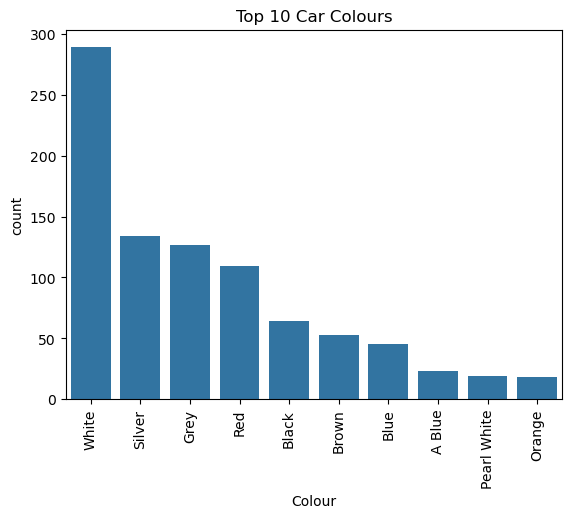

In [59]:
#Top 10 colors of cars
sns.countplot(x = 'Colour', data = df, order = df['Colour'].value_counts().iloc[:10].index).set_title('Top 10 Car Colours')
plt.xticks(rotation = 90)

While a car’s color doesn’t affect its performance, it significantly influences buyer preference. According to the graph, white is the most popular color among used cars, followed by silver, grey, red, and black. This indicates that cars in these colors are more desirable in the used car market and likely to have a better resale value.

Odometre Reading

Text(0.5, 1.0, 'Odometer Reading')

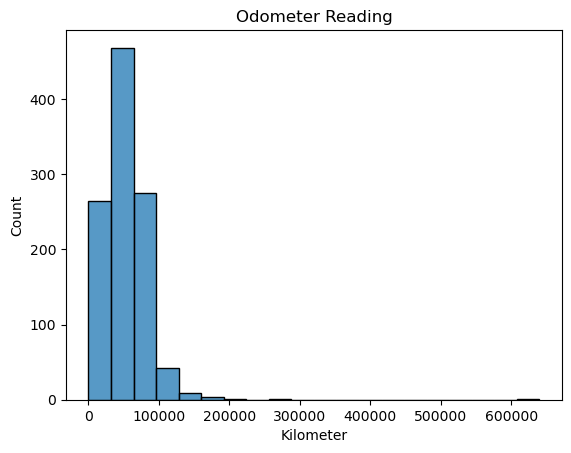

In [63]:
#Odometer reading distribution
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

This graph illustrates the distribution of odometer readings for the cars in the dataset. It reveals that most vehicles have been driven less than 100,000 km, with a significant number falling in the 30,000 km to 50,000 km range. This suggests that cars with lower mileage, particularly those under 100,000 km, are more sought after in the used car market and tend to retain a better resale value.

Body Style

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

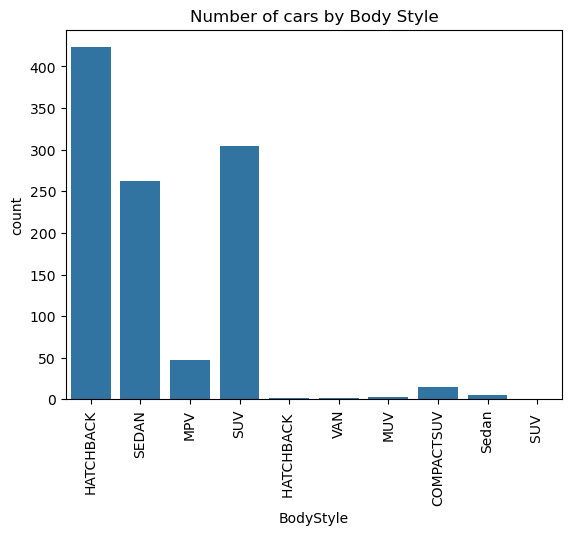

In [70]:
#Body style count
sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

This graph indicates that the majority of cars in the dataset have HatchBack, SUV, or Sedan body styles, reflecting their popularity in the market. Hence, it can be inferred that these body styles are more in demand in the used car segment and are likely to hold better resale value.

Car Age Distribution

Text(0.5, 1.0, 'Car age distribution')

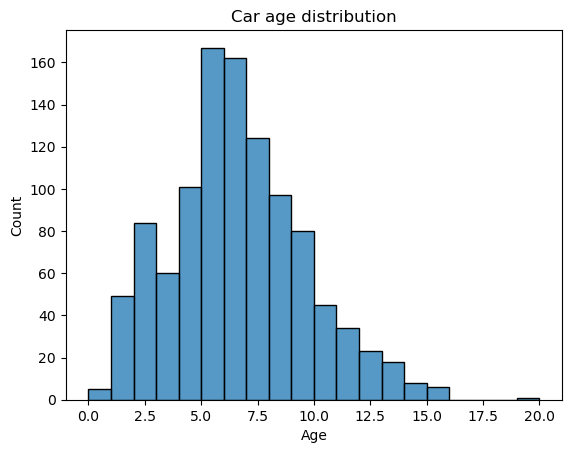

In [74]:
#Car age distribution
sns.histplot(x = 'Age', data = df, bins = 20).set_title('Car age distribution')

The age of a car significantly influences its resale value. In this dataset, most cars fall within the 5 to 7-year age range, with a large portion being over 5 years old — a factor that can reduce their market value. However, there is still a considerable number of vehicles under 5 years of age, which are likely to command a higher resale price.

Additionally, the presence of a car with an age close to 20 years may indicate a potential outlier in the dataset.

Price Distribution

Text(0.5, 1.0, 'Car price distribution')

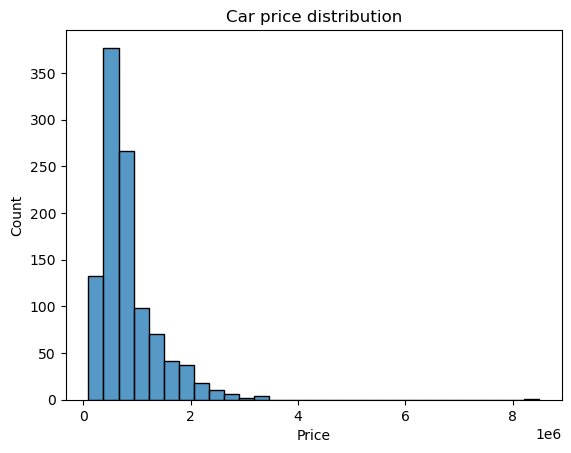

In [80]:
#Price distribution
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

Car age plays a crucial role in determining its resale price. Based on the dataset, a majority of the vehicles are between 5 to 7 years old, with many exceeding 5 years — which typically lowers their resale worth. Nonetheless, a notable number of cars are less than 5 years old, suggesting they might attract better resale value.

Moreover, the dataset includes a vehicle nearly 20 years old, which could possibly be considered an outlier.

Location based Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_23948\196354263.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_23948\196354263.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_23948\196354263.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

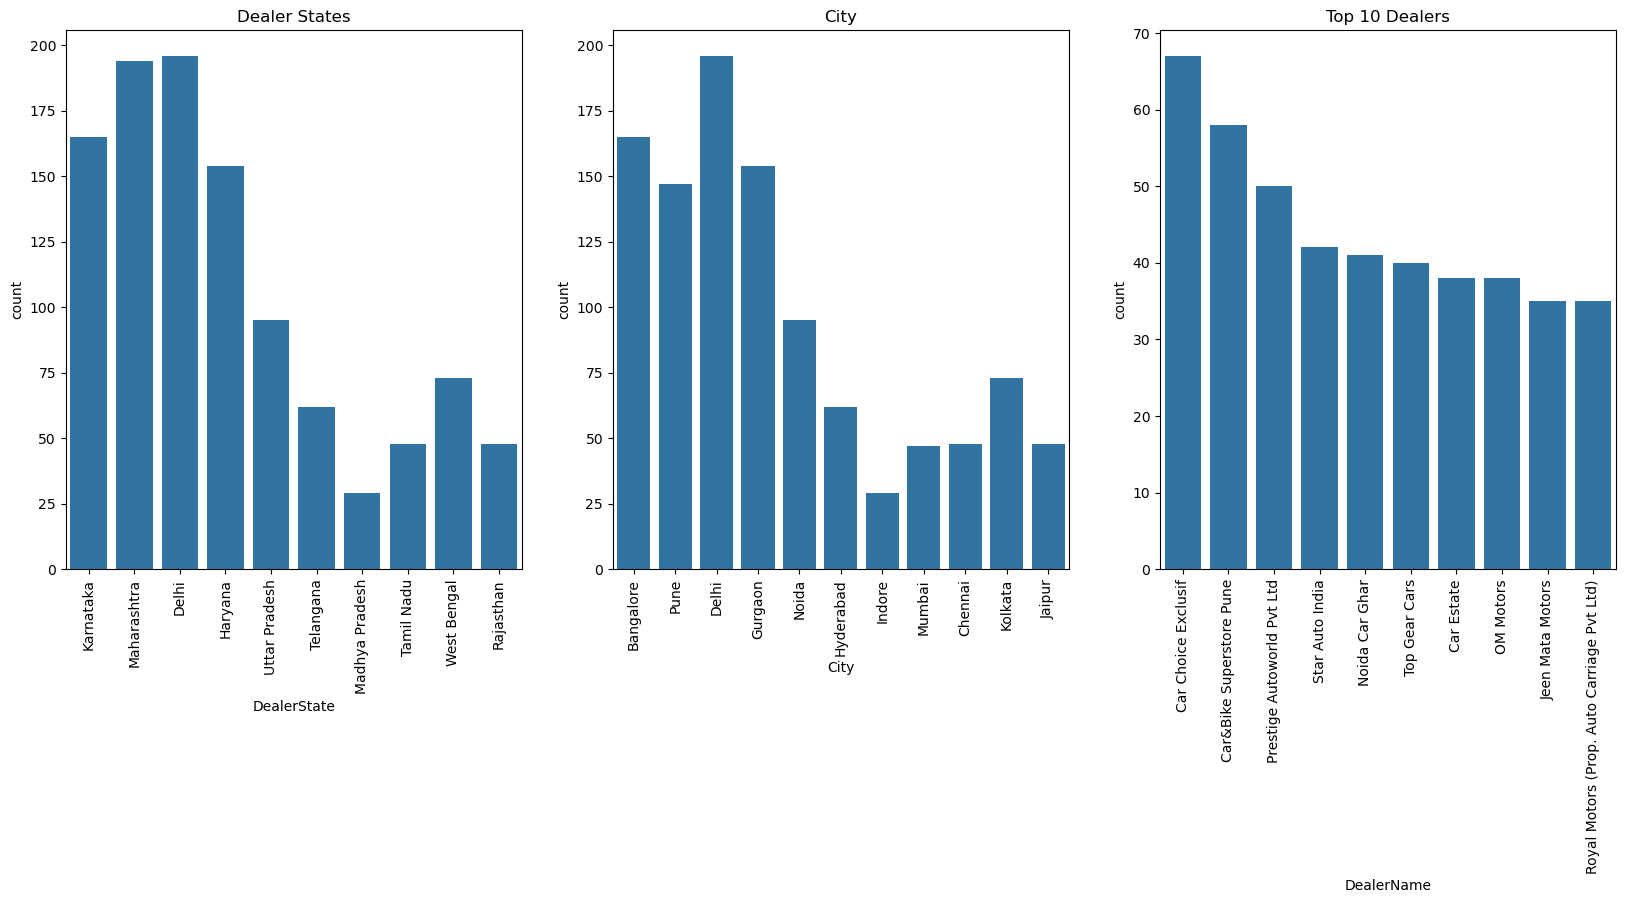

In [84]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

These graphs illustrate the distribution of used cars based on dealer state, city, and dealer name. The state-wise graph indicates that Delhi and Maharashtra lead in the number of used cars available, followed by Karnataka and Haryana. In terms of cities, Delhi records the highest number of used car listings, which aligns with the state-wise trend. Interestingly, Bangalore surpasses Pune in car listings, and Pune even falls behind Gurgaon in terms of the number of used cars for sale.

Looking at the distribution by dealer name, Car Choice Exclusif, Car&Bike Superstore Pune, and Prestige Autoworld Pvt Ltd emerge as the top three dealerships offering the most used cars.

Car Owner Type

Text(0.5, 1.0, 'Number of cars by Owner Type')

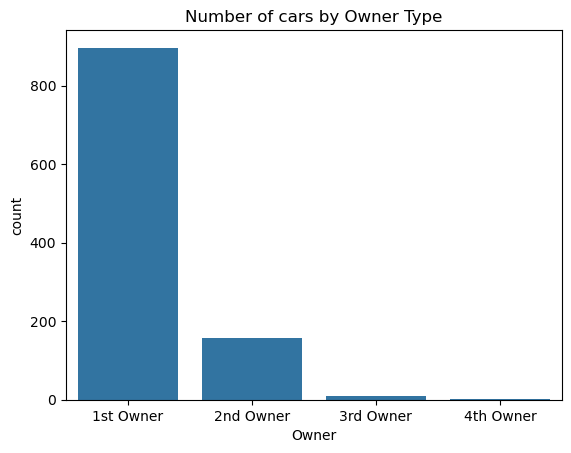

In [88]:
sns.countplot(x = 'Owner', data = df).set_title('Number of cars by Owner Type')

The ownership history of a car plays a crucial role in determining its resale value. Most of the vehicles listed for sale are first-owner cars, with a noticeable drop in numbers for second-owner vehicles. Cars with third or fourth owners are relatively rare in the dataset. This suggests that first-owner cars are more desirable in the used car market and tend to retain a higher resale value.

In [ ]:
Warranty

Text(0.5, 1.0, 'Number of cars by Warranty')

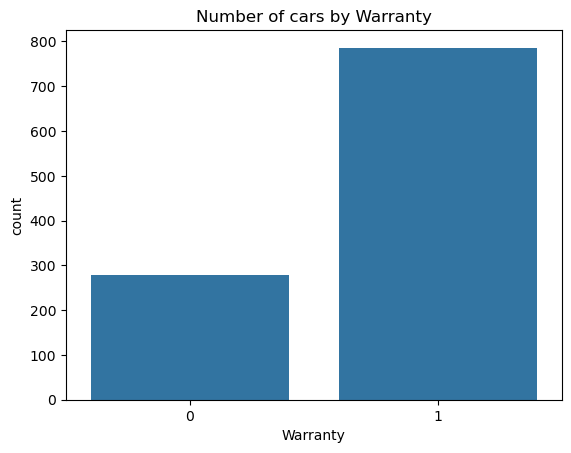

In [91]:
sns.countplot(x = 'Warranty', data = df).set_title('Number of cars by Warranty')

This graph illustrates the number of used cars listed for sale that include a dealership-provided warranty. Warranties play a significant role in influencing buyer decisions, as they offer added assurance. This trend is reflected in the dataset, where the number of cars sold with a warranty is nearly double that of cars sold without one, indicating a clear customer preference for vehicles that come with warranty coverage.

In [ ]:
Quality Score Distribution

Text(0.5, 1.0, 'Quality Score Distribution')

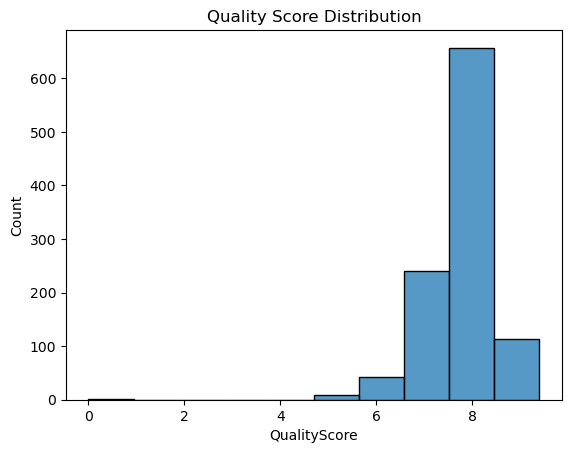

In [94]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('Quality Score Distribution')

Quality score is a crucial factor that significantly affects both the resale value of a car and its attractiveness to buyers. Vehicles with higher quality scores generally fetch better prices and are more desirable in the used car market. In the dataset, the majority of cars have a solid quality score ranging from 7 to 8, suggesting that these cars undergo thorough inspection before being listed for resale. However, there are a few cars with scores below 5, which may indicate poor condition or advanced age.

Now, I will be looking at the relationship between the Car Price and the independent variables.

Top 10 Car Companies by Price

Text(0.5, 1.0, 'Top 10 car Companies by price')

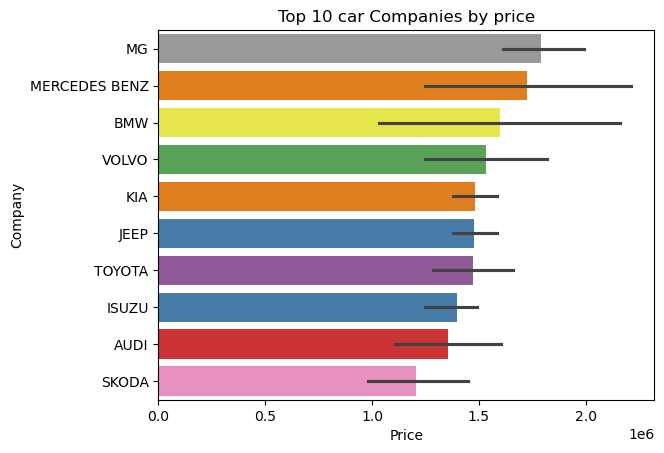

In [97]:
#Top 10 car companies by price
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, 
            hue = 'Company', palette= 'Set1').set_title('Top 10 car Companies by price')

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features.

Moreover, my prevous hypothesis, about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price

Top 10 Car Models by Price

Text(0.5, 1.0, 'Top 10 car Models by price')

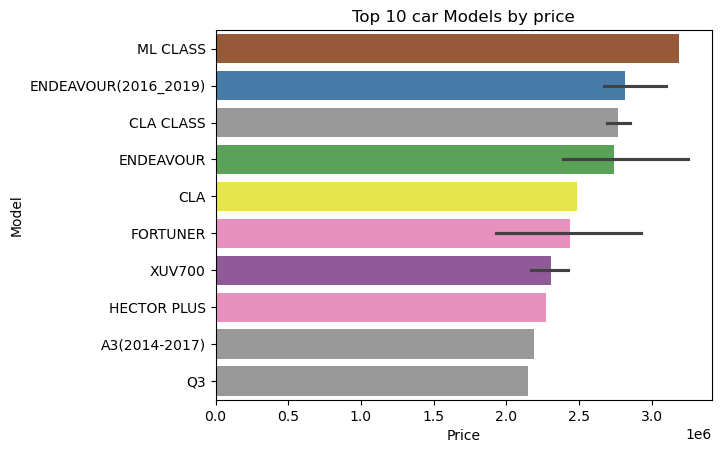

In [100]:
#Top 10 car models by price
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index,
            hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')

This graph shows the relation between the car model and it resale value and we can see that it shows similarity woth the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.

Car Fuel Type and Price

Text(0.5, 1.0, 'Price by Fuel Type')

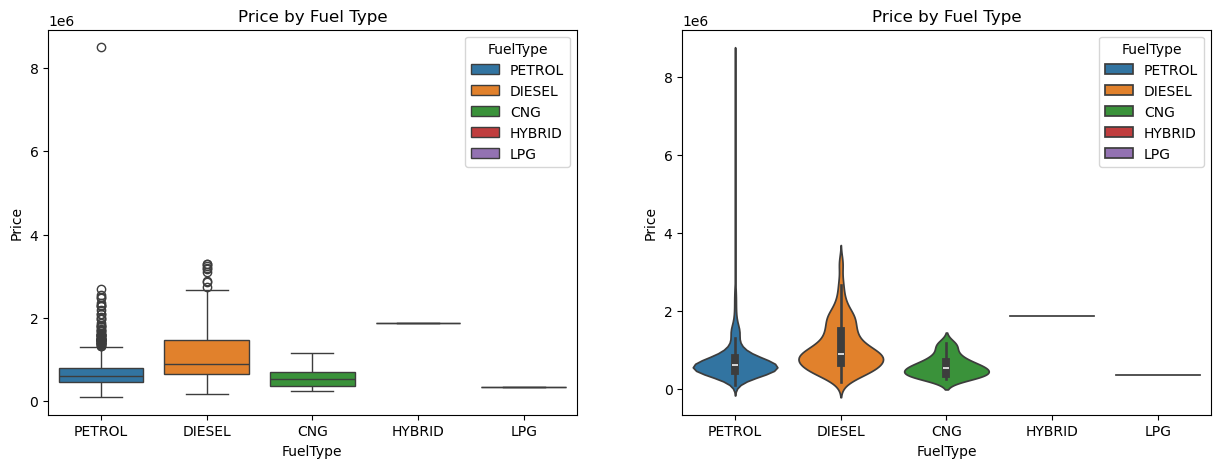

In [103]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')

The above plots visualizes the relationship between the car fuel type and its resale value. In the boxplot we can see than cars with diesel fuel type have higher resale value than petrol and CNG and LPG. In the violin plot, we can see that the distribution of the price for diesel cars is more concentrated between 10 to 20 lakh as compared to Petrol. From this it is cleared that, customers prefer petrol and diesel car than other fuel type and the diesel cars are more in demand in the used car market.

Top 10 Car Colors by Price

Text(0.5, 1.0, 'Top 10 car Colors by price')

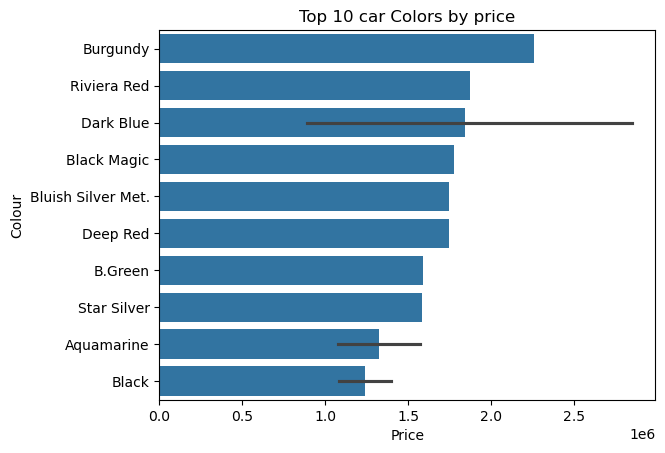

In [106]:
#Top 10 car colors by price
sns.barplot(y = 'Colour', x = 'Price', data = df, order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index).set_title('Top 10 car Colors by price')

The cars with colors like Burgundy, Riviera Red and Dark Blue have higher resale value as compared to other colors. This shows that color of the car does matter and plays a major role in the resale value of the car.

Moreover, we also came to know that exotic colors have more price but they are not in demand in the used car market.

Body Style and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

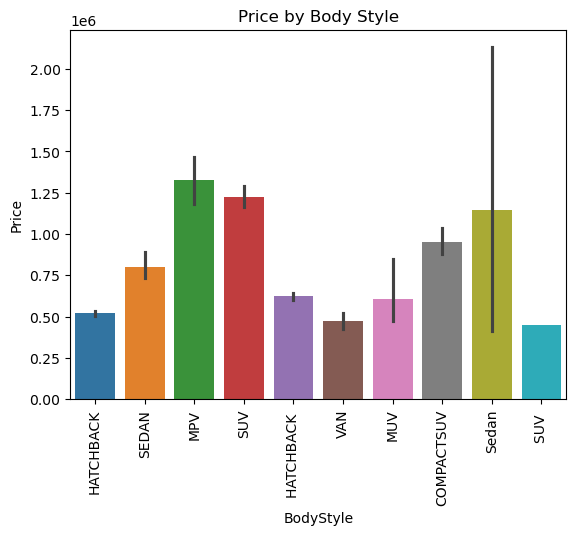

In [109]:
sns.barplot(x = 'BodyStyle', y = 'Price', data = df, hue = 'BodyStyle').set_title('Price by Body Style')
plt.xticks(rotation = 90)

MPV, SUV and Sedan are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the used car market and have a good resale value. This also shows that my assumption was correct however, the Hatchback body style cars despite being in majority have lower resale value.

Car Age and Price

Text(0.5, 1.0, 'Car age and Price')

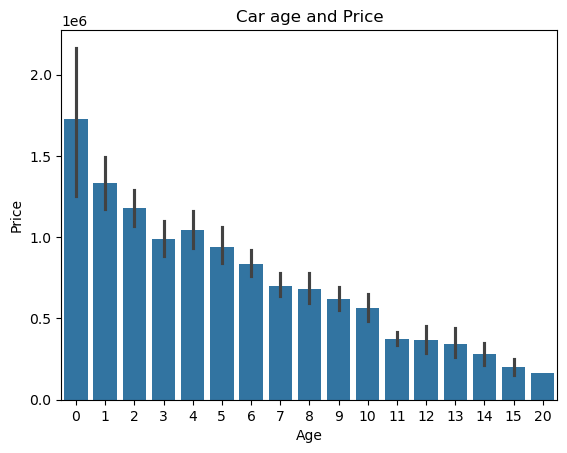

In [112]:
sns.barplot(x = 'Age', y = 'Price', data = df).set_title('Car age and Price')

As we discussed earlier, age is a key determinant for a car's resale value and this graph clearly visulaizes the relation of the age with car price. The cars with age less than a year has then highest price and as the age increases the prices decreases gradually. Therefore, my hypothesis was correct that cars with age less than 5 years have higher resale value.

Location based Price Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_23948\7821321.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_23948\7821321.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\HP\AppData\Local\Temp\ipykernel_23948\7821321.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

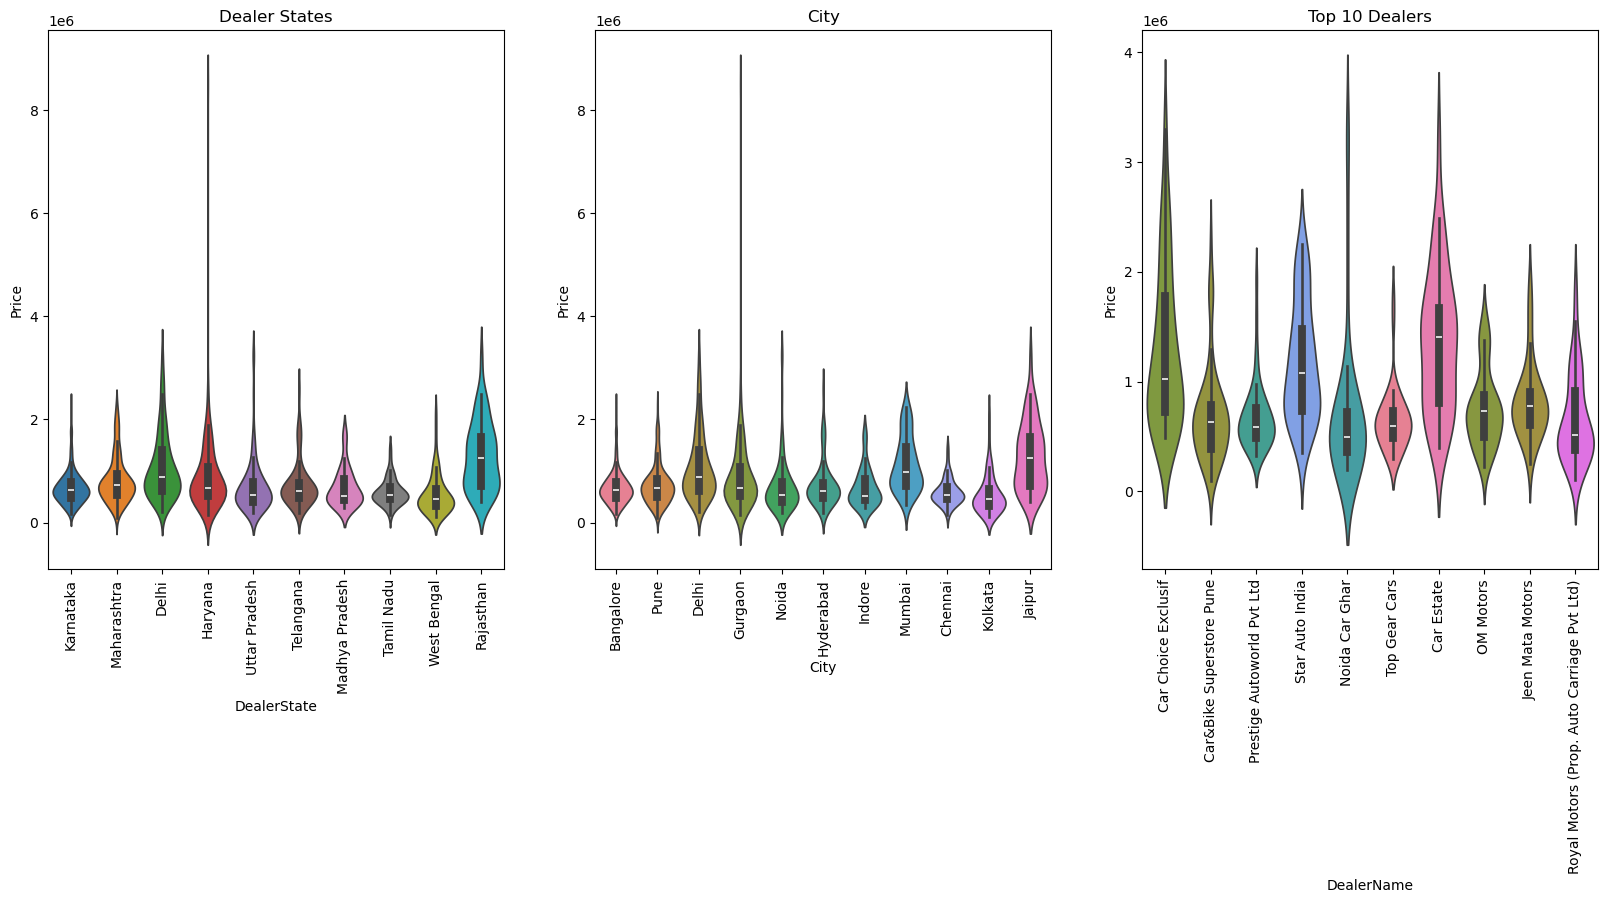

In [115]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In the above graph we can see the price distribution based on the state, city and the dealer name. In the state graph, we can see that the cars in Rajastan have the highest price followed by Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Haryana. In the city graph, we can see that the cars in Jaipur have the highest price followed by Mumbai and Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, we can see the top 10 dealers along with their price distribution. Here, Car Estate has the highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Noida Car Ghar.

Car Owner Type and Price

Text(0.5, 1.0, 'Price by Owner Type')

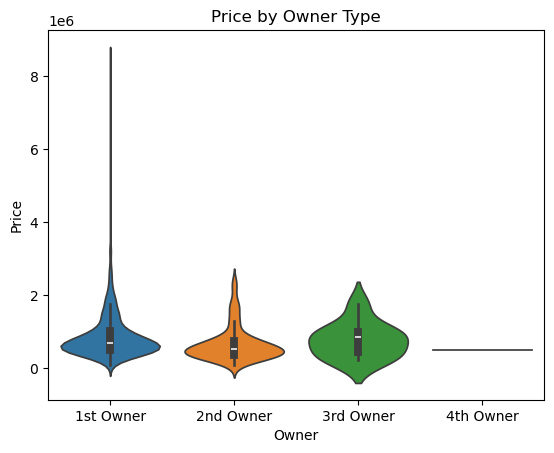

In [118]:
sns.violinplot(x = 'Owner', y = 'Price', data = df, hue = 'Owner').set_title('Price by Owner Type')

The graph shows the price distribution with respect to the car owner type. The cars with 1st owner have the highest price which is obvious as they are new cars. However, the 3rd Owner type cars depite being less in number have higher price than 2nd Owner type cars, which is not obvious. Therefore, we can assume that 3rd Owner type cars having higher price could some luxury or vintage cars.

Warranty and Price

Text(0.5, 1.0, 'Price by Warranty')

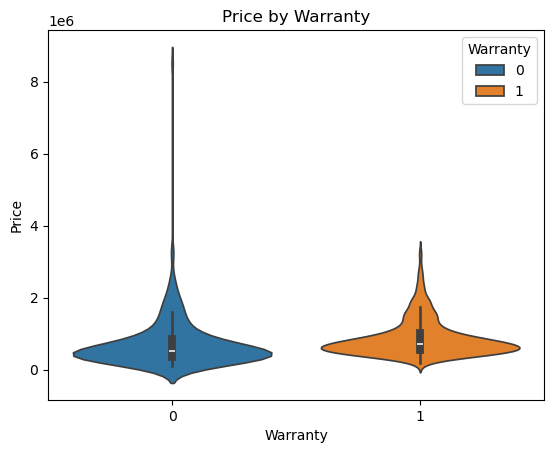

In [121]:
sns.violinplot(x = 'Warranty', y = 'Price', data = df, hue = 'Warranty').set_title('Price by Warranty')

Here, we can see some change in the violinplot of the cars with and without warranty. The cars with warranty tends to have slightly higher price than the cars without warranty. Therefore, we can assume that cars with warranty are more preferred in the used car market and have a good resale value.

Quality Score and Price

Text(0.5, 1.0, 'Quality Score and Price')

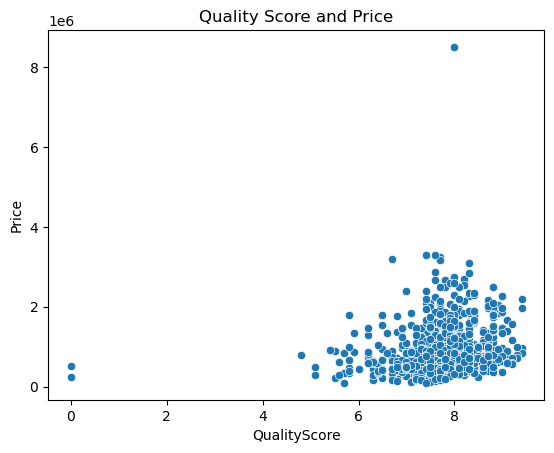

In [124]:
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('Quality Score and Price')

We can see a very high concentration near the quality score 7 and above having much higher price than the cars with quality score less than 7. Therefore, we can assume that cars with quality score 7 and above are more preferred in the used car market and have a good resale value.

Data Preprocessing Part 2

Dropping column car model beacause, it has too many unique values and it will increase the dimensionality of the dataset

In [128]:
df.drop('Model', axis = 1, inplace = True)

Label Encoding

In [130]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
#Label encoding object
le = LabelEncoder()

#label encoding for object type columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


Outlier Removal

In [132]:
#Using IQRS to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Correlation Matrix Heatmap

<Axes: >

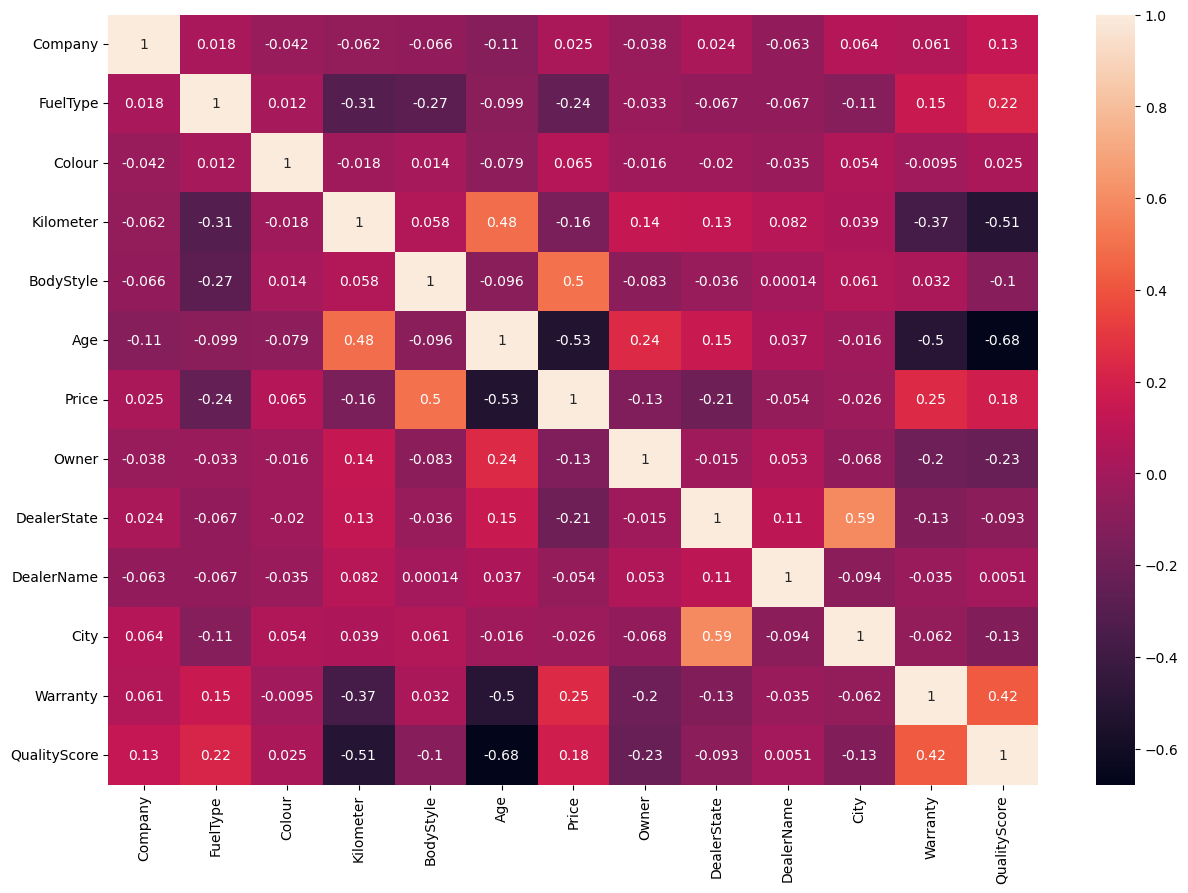

In [134]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Train Test Split

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

Model Building

I will be using the following regression models:

Decision Tree Regressor
Random Forest Regressor
Ridge Regressor

Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

Hyperparameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [143]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=42)

#Fitting the model
dtr.fit(X_train, y_train)

#Training score
print(dtr.score(X_train, y_train))

0.7445153281346839


In [145]:
#Prediction
dtr_pred = dtr.predict(X_test)

Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr = RandomForestRegressor()

Hyperparameter Tuning

In [149]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [150]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfr.fit(X_train, y_train)

#Training score
print(rfr.score(X_train, y_train))

0.8781873430425237


In [151]:
#Prediction
rfr_pred = rfr.predict(X_test)

Model Evaluation

Distribution Plot

C:\Users\HP\AppData\Local\Temp\ipykernel_23948\60301046.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
C:\Users\HP\AppData\Local\Temp\ipykernel_23948\60301046.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

<Axes: title={'center': 'Random Forest Regressor'}, ylabel='Density'>

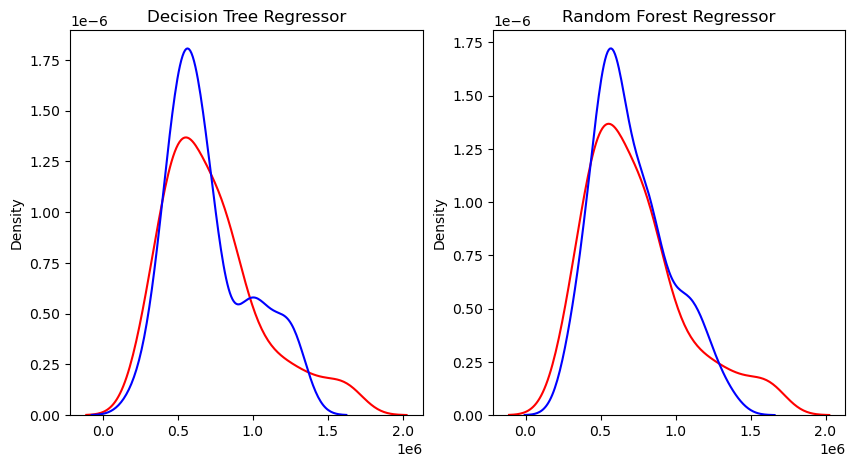

In [153]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

#decision tree regressor
sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
sns.distplot(x = dtr_pred, ax = ax[0], color = 'b', hist = False, label = 'Predicted')

#random forest regressor
sns.distplot(x = y_test, ax = ax[1], color = 'r', hist = False, label = 'Actual').set_title('Random Forest Regressor')
sns.distplot(x = rfr_pred, ax = ax[1], color = 'b', hist = False, label = 'Predicted')

Model Metrics

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Decision Tree Regressor
print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score : ', r2_score(y_test, dtr_pred))

#Random Forest Regressor
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rfr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score : ', r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error :  46746127636.183586
Mean Absolute Error :  161645.14749542723
R2 Score :  0.5660724036960223
Random Forest Regressor
Mean Squared Error :  31811887039.002945
Mean Absolute Error :  134717.2267038187
R2 Score :  0.704701621829243


Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

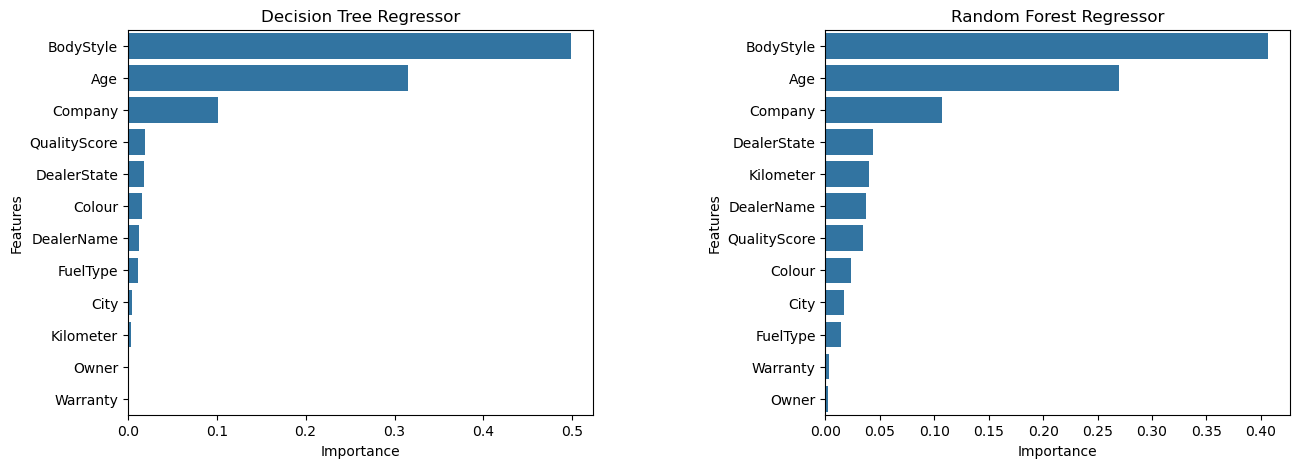

In [160]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

Conclusion

Through exploratory data analysis, two key insights emerged regarding the used car market: demand patterns and pricing trends. It was observed that lower-priced used cars are in much higher demand compared to expensive ones, indicating that buyers tend to prioritize affordability when purchasing pre-owned vehicles.

A deeper dive into the data revealed interesting brand-related preferences. Luxury car brands such as MG, Mercedes-Benz, BMW, Volvo, and KIA generally command higher prices, but they don’t enjoy the same level of demand as budget-friendly brands like Maruti Suzuki, Hyundai, Honda, Mahindra, and Tata. This suggests that while customers may prefer luxury cars when buying new, they lean toward more economical options in the used car segment.

In terms of fuel type, most used cars run on either petrol or diesel, with diesel vehicles slightly edging out in price. Additionally, car color plays an interesting role in both demand and pricing. Common shades such as white, grey, silver, and black are more popular among buyers, while rare or exotic colors like burgundy, riviera red, dark blue, and black magic are associated with higher prices.

Odometer readings are another important factor—most cars have clocked under 10,000 km, and those with lower mileage tend to fetch higher prices. When it comes to bodystyle, types like Hatchback, SUV, and Sedan are in greater demand, while MPVs, SUVs, and Sedans also represent the highest-priced segment.

The age of the car significantly affects its resale value. Cars that are less than 5 years old are generally priced higher and are more desirable. Additionally, location influences pricing, with Delhi, Maharashtra, and Rajasthan showing the highest average car prices. Among the dealers, Car Estate, Star Auto India, and Car Choice stood out as the ones offering the most expensive listings.

Buyers also show a strong preference for first-owner vehicles, which not only boosts demand but also increases the price. Vehicles that come with a warranty provide added assurance to customers and are therefore priced slightly higher. Lastly, the quality score of a car is a strong predictor of its value—cars with higher quality ratings consistently command higher prices.

For the price prediction, I employed two machine learning models: Decision Tree Regressor and Random Forest Regressor. The Random Forest Regressor outperformed the Decision Tree, delivering more accurate predictions. Feature importance analysis revealed that car age, bodystyle, and company are the most influential factors affecting used car prices.